In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('city_temperature.csv')
df.head()
sns.set(style = 'darkgrid')
plt.figure(figsize=(5,6))

<Figure size 500x600 with 0 Axes>

<Figure size 500x600 with 0 Axes>

## Task to do
- Data Cleaning and Preparation
### Quesions
1. Which are to top hottest and coldest cities?
2. Seasonal Trand in major US cities and major Asian Cities.
3. Computes standard deviation of temperature and gets top 6 cities by variability

In [3]:
df.isna().sum()
# 1
total = len(df)
missing = df[df['State'].isna()]
missper = (len(missing)/total)*100
# Almost 50% of the state data is missing so it is preferable to drop the column
df.dropna(axis = 1,inplace =True)


2.73% percent of the Avg Temp are missing


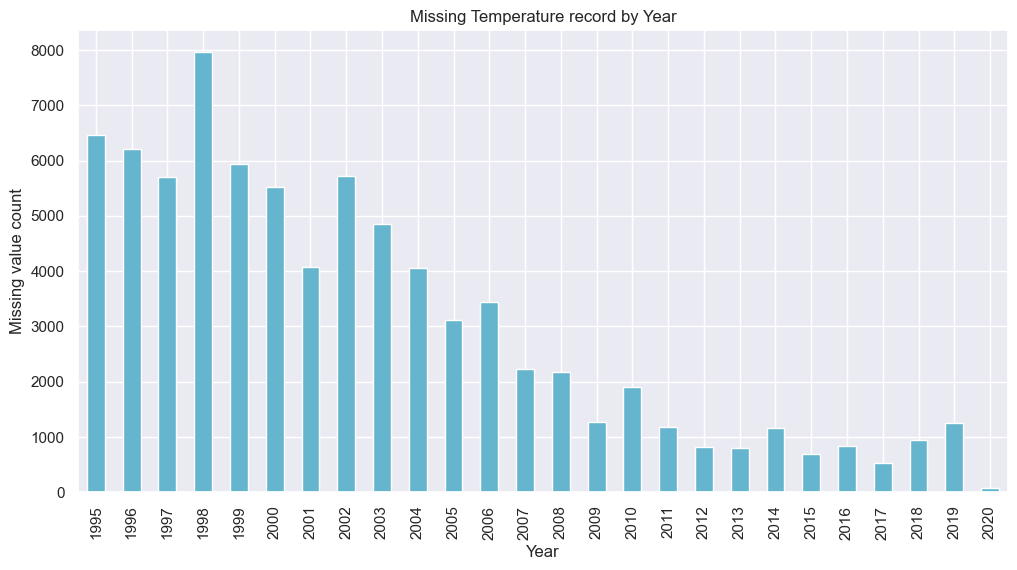

In [4]:
# 2
# some of the avaTemp has -99 value which is not possible
df['AvgTemperature'] = df['AvgTemperature'].replace(-99,np.nan)
df.isna().sum()

# Drop and strips Whitespace,implausible, and missing data
df['AvgTemperature'] = round((df['AvgTemperature'] - 32) * 5/9, 2)
df['Date'] = pd.to_datetime(df[['Year','Month',"Day"]],errors = 'coerce')
df.dropna(subset = ['Date'],inplace = True)
df['City'] = df['City'].str.strip()
df['Country'] = df['Country'].str.strip()
df =df[df['Year']>=1900]

# Removing Duplicates
df.duplicated().sum(0)
df.drop_duplicates(inplace = True)
# Missing Temp
per =  (len(df[df['AvgTemperature'].isna()])/len(df))*100
print(f'{per:.2f}% percent of the Avg Temp are missing')
 # Nearly 3% missing Temperature and Ploting

missing = df[df['AvgTemperature'].isna()].groupby(['Year']).size()
plt.figure(figsize=(12,6))
missing.plot(kind = 'bar',color = 'C9')
plt.title("Missing Temperature record by Year")
plt.ylabel("Missing value count")
plt.show()

## Question 1
- Which are to top hottest and coldest cities?

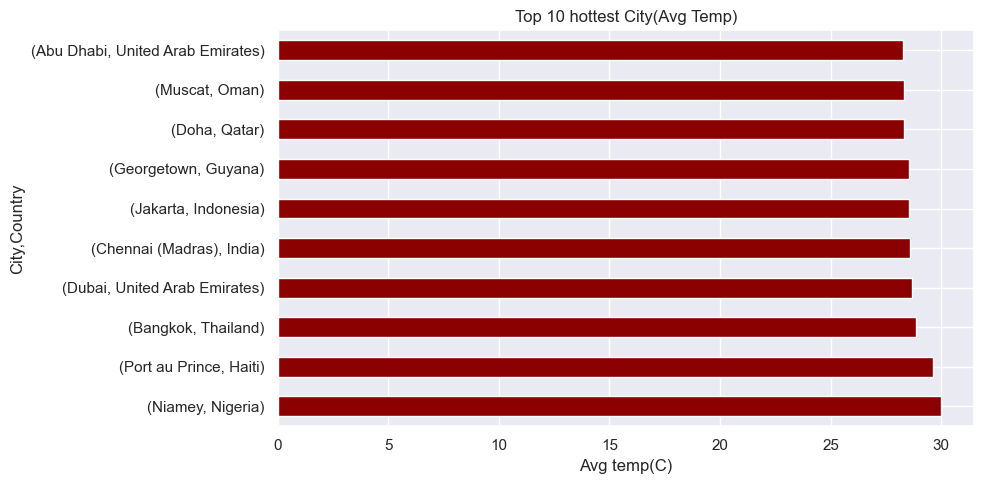

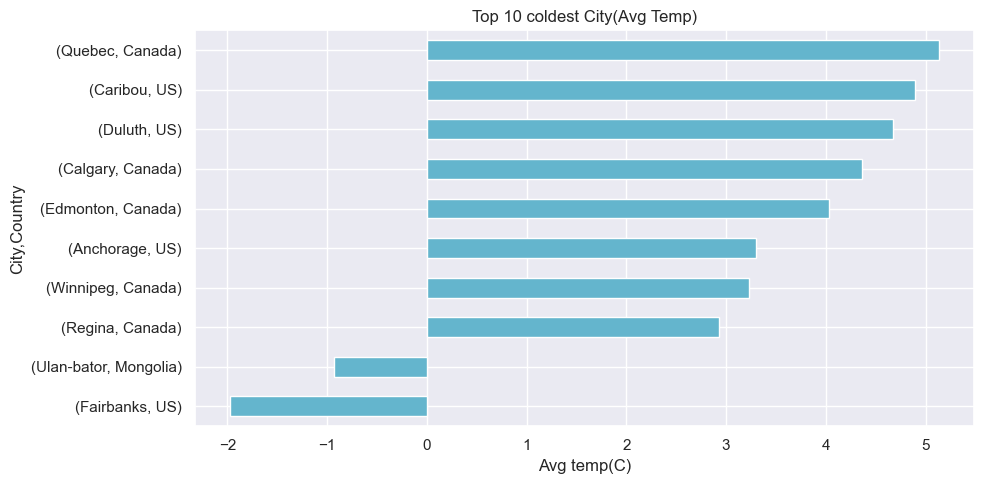

In [5]:
df.head()
top10 = df.groupby(['City','Country'])["AvgTemperature"].mean().dropna().round(2)

top10_hottest = top10.sort_values(ascending = False).head(10)
top10_coldest = top10.sort_values().head(10)
# Plot hottest
plt.figure(figsize=(10, 5))
top10_hottest.plot(kind = 'barh',color = 'darkred')
plt.title('Top 10 hottest City(Avg Temp)')
plt.xlabel("Avg temp(C)")
plt.tight_layout()
plt.show()

# Plot Coldest
plt.figure(figsize=(10, 5))
top10_coldest.plot(kind = 'barh',color = 'C9')
plt.title('Top 10 coldest City(Avg Temp)')
plt.xlabel("Avg temp(C)")
plt.tight_layout()
plt.show()

## Question 2
- Seasonal Trand in major US cities and major Asian Cities.

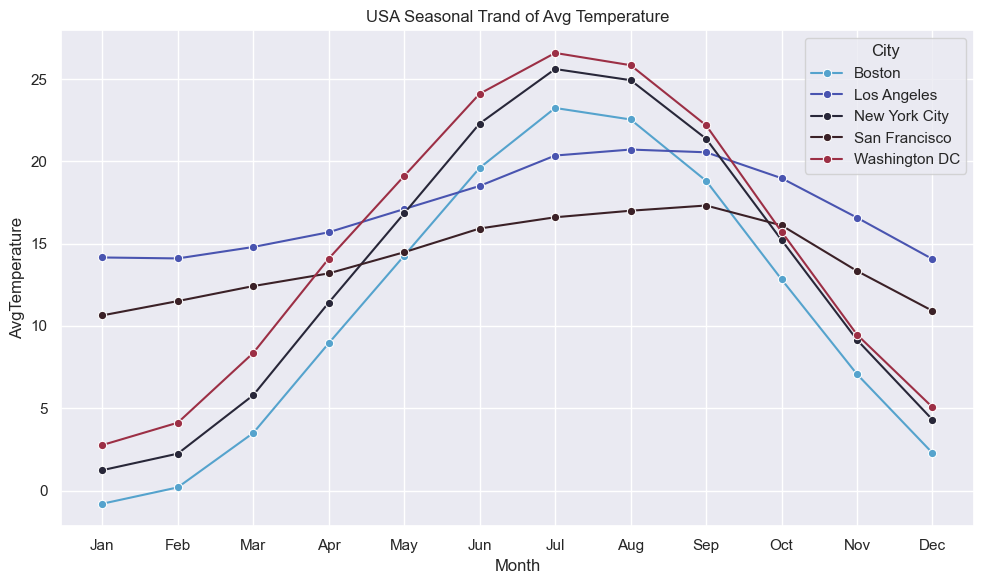

In [6]:
# for Usa
select_us_cities = ['New York City','Los Angeles','Washington DC','Boston','San Francisco']

us_cities = df[(df['Country'] == 'US') & (df['City'].isin(select_us_cities))]
selected = us_cities.groupby(['City','Month'])['AvgTemperature'].mean().reset_index()
selected
# Ploting
plt.figure(figsize=(10,6))
sns.set(style = 'darkgrid')
sns.set_palette("icefire")
sns.lineplot(x = selected.Month,
             y = selected.AvgTemperature,
             hue = selected.City,
            marker = 'o')
plt.title("USA Seasonal Trand of Avg Temperature")

#Adding months
plt.xticks(ticks=range(1,13), 
           labels=[calendar.month_abbr[i] for i in range(1,13)])

plt.tight_layout()
plt.show()

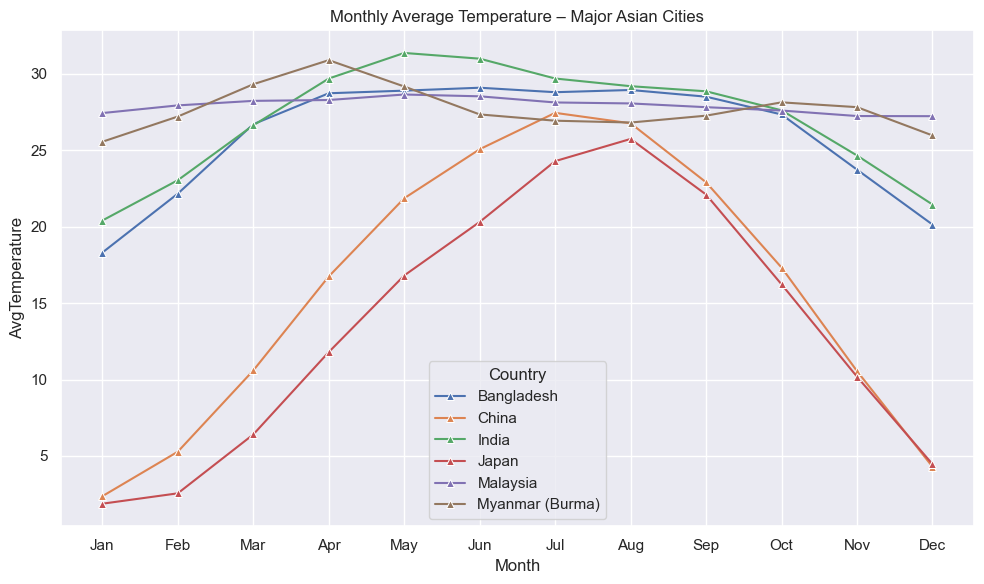

In [7]:
# for asia
df.head()
seleced_country = ['Bangladesh','India','Japan','Malaysia','Myanmar (Burma)','China']
selected = df[(df['Region'] == 'Asia') & (df['Country'].isin(seleced_country))]
selected = selected.groupby(['Country','Month'])['AvgTemperature'].mean().reset_index()
selected
plt.figure(figsize=(10,6))
sns.set(style = 'darkgrid')
# sns.set_palette("")
sns.lineplot(x = selected.Month,
             y = selected.AvgTemperature,
             data = selected,
             hue = selected.Country,
             marker = '^')
plt.xticks(ticks = range(1,13),
          labels = [calendar.month_abbr[i] for i in range(1,13)])
plt.title('Monthly Average Temperature – Major Asian Cities')
plt.tight_layout()
plt.show()

## Question 3
- Computes standard deviation of temperature and gets top 6 cities by variability

In [8]:
select_var = df.groupby(['Country','City'])['AvgTemperature'].std().sort_values(ascending =False).head(6).reset_index()
selected = df[df['City'].isin(select_var['City'])]
selected['City_country'] = selected['City']+','+selected['Country']

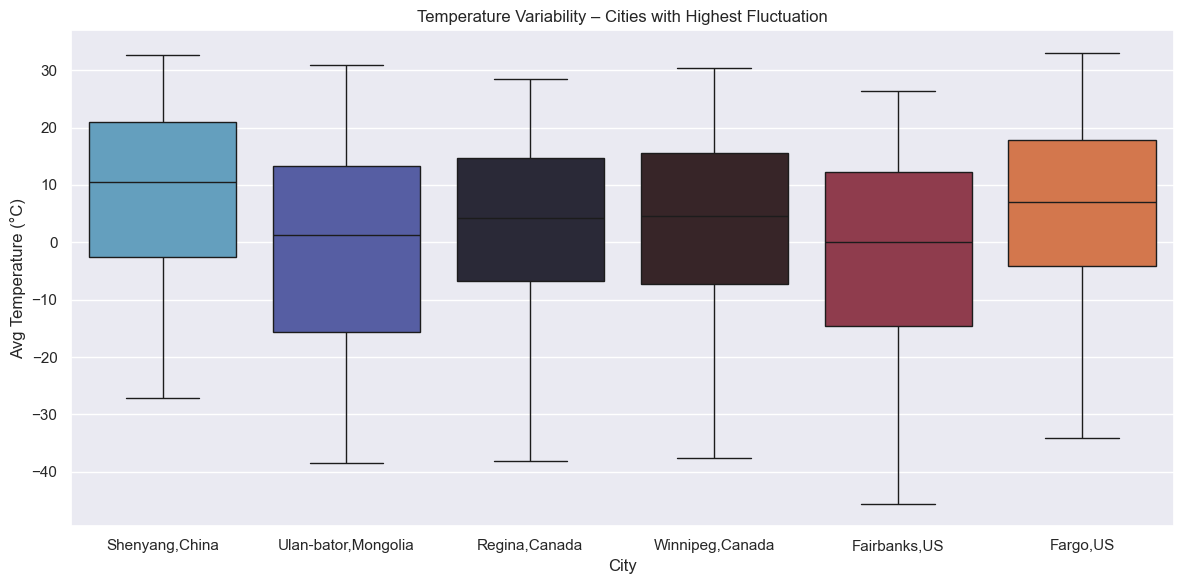

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'City_country',
            y = 'AvgTemperature',
            data = selected,
            palette='icefire')
plt.title('Temperature Variability – Cities with Highest Fluctuation')
plt.ylabel('Avg Temperature (°C)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

# Key Insights
- Tourism
  Bangkok, Dubai have constant warm weather ideal for tour. But if you want to explore the coldest city you can go Fairbanks or Ulan-bator.
- Data quality
  Aprox 2.73% of the temperature is missing. It has cleaned for batter analysis.